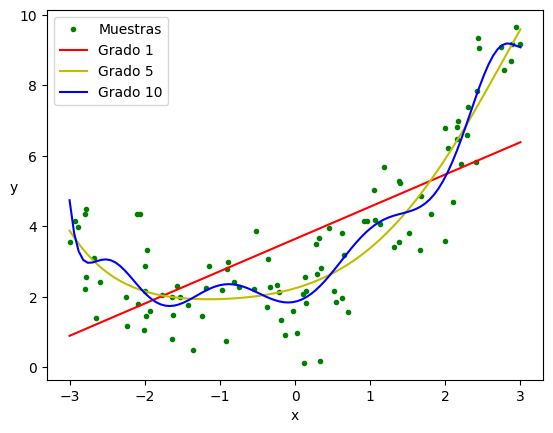

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

poly_features_A = PolynomialFeatures(degree=1, include_bias=False)
X_poly_A = poly_features_A.fit_transform(X)

poly_features_B = PolynomialFeatures(degree=5, include_bias=False)
X_poly_B = poly_features_B.fit_transform(X)

poly_features_C = PolynomialFeatures(degree=10, include_bias=False)
X_poly_C = poly_features_C.fit_transform(X)

lin_reg_A = LinearRegression()
lin_reg_A.fit(X_poly_A, y)

lin_reg_B = LinearRegression()
lin_reg_B.fit(X_poly_B, y)

lin_reg_C = LinearRegression()
lin_reg_C.fit(X_poly_C, y)

X_new = np.linspace(-3, 3, m).reshape(m, 1)
X_new_poly_A = poly_features_A.transform(X_new)
X_new_poly_B = poly_features_B.transform(X_new)
X_new_poly_C = poly_features_C.transform(X_new)

y_new_A = lin_reg_A.predict(X_new_poly_A)
y_new_B = lin_reg_B.predict(X_new_poly_B)
y_new_C = lin_reg_C.predict(X_new_poly_C)

fig = plt.figure()

plt.plot(X, y, 'g.', label="Muestras")
plt.plot(X_new, y_new_A, 'r', label="Grado 1")
plt.plot(X_new, y_new_B, 'y', label="Grado 5")
plt.plot(X_new, y_new_C, 'b', label="Grado 10")

plt.legend(loc="upper left")
plt.ylabel("y", rotation=0)
plt.xlabel("x")

plt.show()
fig.savefig('grafica.eps', format='eps')